In [28]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# k-means clustering

### 데이터 준비
* 테스트 데이터 생성
    * make_blobs()

In [29]:
# 2개의 군집을 가지는 테스트 데이터 생성
from sklearn.datasets import make_blobs
features, targets = make_blobs(n_samples=200, 
                    n_features=2,
                    centers=3,
                    cluster_std=0.8,
                    random_state=0)

print(features.shape, targets.shape)

(200, 2) (200,)


In [30]:
# 생성된 테스트데이터로 DataFrame 만들기
cluster_df = pd.DataFrame(features, columns=['feature1','feature2'])
cluster_df['target'] = targets
cluster_df.head(3)

,feature1,feature2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


In [31]:
# target 데이터의 빈도수
cluster_df['target'].value_counts()

target
0    67
1    67
2    66
Name: count, dtype: int64

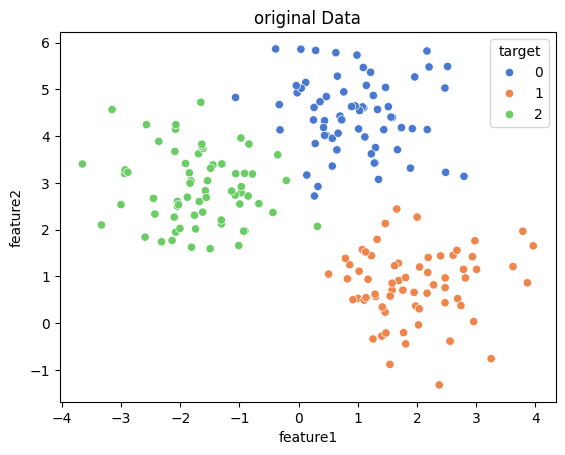

In [32]:
# 데이터 시각화
sns.scatterplot(data=cluster_df, x='feature1', y='feature2', hue='target', palette='muted')
plt.title('original Data')
plt.show()

### 스케일링

In [33]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
cluster_df[['scaled_feature1','scaled_feature2']] = scaled_features 
cluster_df.head()

,feature1,feature2,target,scaled_feature1,scaled_feature2
0,-1.692427,3.622025,2,-1.226105,0.541123
1,0.697940,4.428867,0,0.155288,1.019338
2,1.100228,4.606317,0,0.387771,1.124513
3,-1.448724,3.384245,2,-1.085269,0.400190
4,1.214861,5.364896,0,0.454017,1.574123


### 군집화

In [34]:
# 클러스터링 객체 생성
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3)

# 학습 및 클러스터링 결과 예측
# km.fit(features)
# kmeans_cluster = km.predict(features)
kmeans_cluster = km.fit_predict(scaled_features)

print(kmeans_cluster)

[0 2 2 0 2 0 1 1 2 0 2 0 2 2 2 0 1 1 2 0 0 1 2 2 0 2 1 0 0 0 2 2 0 2 1 1 2
 1 1 0 1 0 0 0 2 2 2 0 2 2 2 1 0 0 0 0 1 1 2 2 0 0 2 1 1 0 1 1 0 1 1 2 2 0
 2 0 1 1 1 0 0 2 2 1 1 2 2 0 2 1 0 0 1 2 1 2 2 0 0 1 1 2 0 2 0 2 1 2 2 1 2
 0 1 2 2 2 2 1 0 0 1 1 0 2 1 2 0 1 0 2 0 1 1 1 2 1 1 2 1 0 0 0 2 1 1 2 0 0
 1 2 1 0 0 0 2 1 1 1 2 2 1 0 0 0 2 2 1 0 1 1 2 1 2 1 0 0 2 0 2 1 2 0 1 1 1
 2 0 1 2 2 0 0 1 1 1 1 0 1 2 1]


In [35]:
# 데이터프레임에 군집과 결과인 kmeans_cluster 컬럼 추가
cluster_df['kmeans_cluster'] = kmeans_cluster
cluster_df.head(3)

,feature1,feature2,target,scaled_feature1,scaled_feature2,kmeans_cluster
0,-1.692427,3.622025,2,-1.226105,0.541123,0
1,0.697940,4.428867,0,0.155288,1.019338,2
2,1.100228,4.606317,0,0.387771,1.124513,2


In [36]:
# 클러스터의 중심
km.cluster_centers_

array([[-1.25215574,  0.10571814],
       [ 0.88326502, -1.12531839],
       [ 0.2952345 ,  1.02581896]])

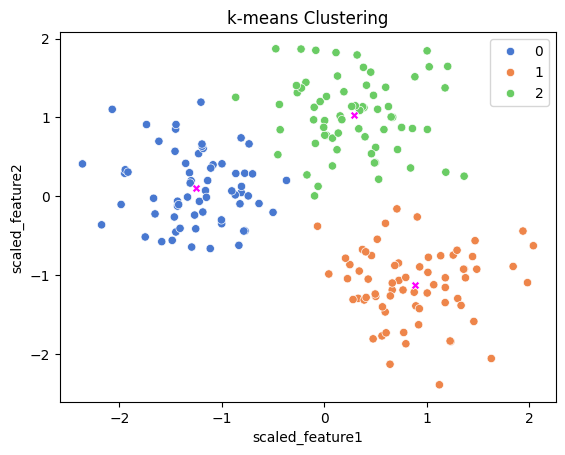

In [37]:
# 군집화 결과 시각화
sns.scatterplot(data=cluster_df, 
                x='scaled_feature1', 
                y='scaled_feature2', 
                hue='kmeans_cluster', 
                palette='muted')

# 개별 군집의 중심 좌표
sns.scatterplot(x=km.cluster_centers_[:,0], 
                y=km.cluster_centers_[:,1], 
                color='magenta',
                marker='X')

plt.title('k-means Clustering')
plt.show()

### elbow 방법

In [38]:
inertia = []
for n in range(2,7):
    km = KMeans(n_clusters=n)
    km.fit(scaled_features)
    print(km.inertia_)
    inertia.append(km.inertia_)

186.67497367969395
82.26479176993621
71.47191817064007
61.56746228009874
55.29885390388845


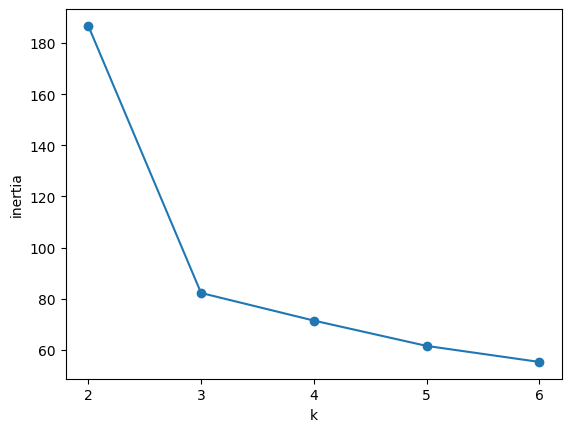

In [39]:
plt.plot(range(2,7), inertia, marker='o')
plt.xticks(range(2,7))
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

### 실루엣 분석

In [40]:
# 개별 실루엣 계수
from sklearn.metrics import silhouette_samples
cluster_df['silhouette'] = silhouette_samples(scaled_features, kmeans_cluster)
cluster_df.head()

,feature1,feature2,target,scaled_feature1,scaled_feature2,kmeans_cluster,silhouette
0,-1.692427,3.622025,2,-1.226105,0.541123,0,0.588204
1,0.697940,4.428867,0,0.155288,1.019338,2,0.656732
2,1.100228,4.606317,0,0.387771,1.124513,2,0.698610
3,-1.448724,3.384245,2,-1.085269,0.400190,0,0.601807
4,1.214861,5.364896,0,0.454017,1.574123,2,0.652481


In [41]:
# 다른 군집에 클러스터가 할당된 데이터가 있는지 확인
cond = cluster_df['silhouette'] < 0
cluster_df.loc[cond]

,feature1,feature2,target,scaled_feature1,scaled_feature2,kmeans_cluster,silhouette
113,-0.353641,3.599924,2,-0.452421,0.528023,2,-0.02594


In [42]:
# 평균 실루엣 계수
from sklearn.metrics import silhouette_score
silhouette_score(scaled_features, kmeans_cluster)

np.float64(0.5759307295366247)

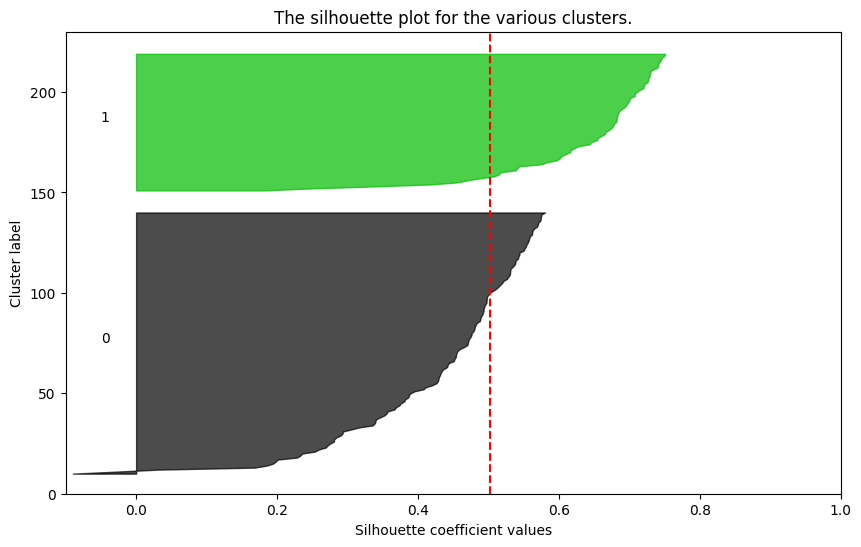

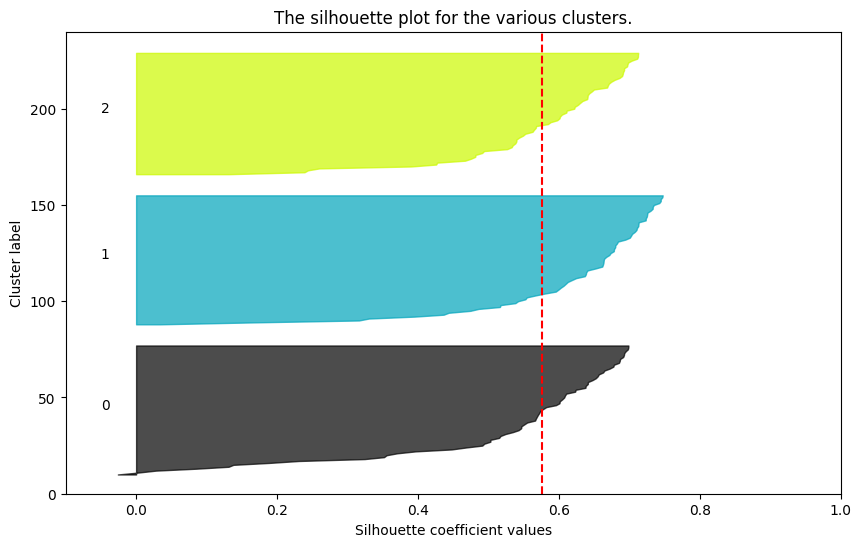

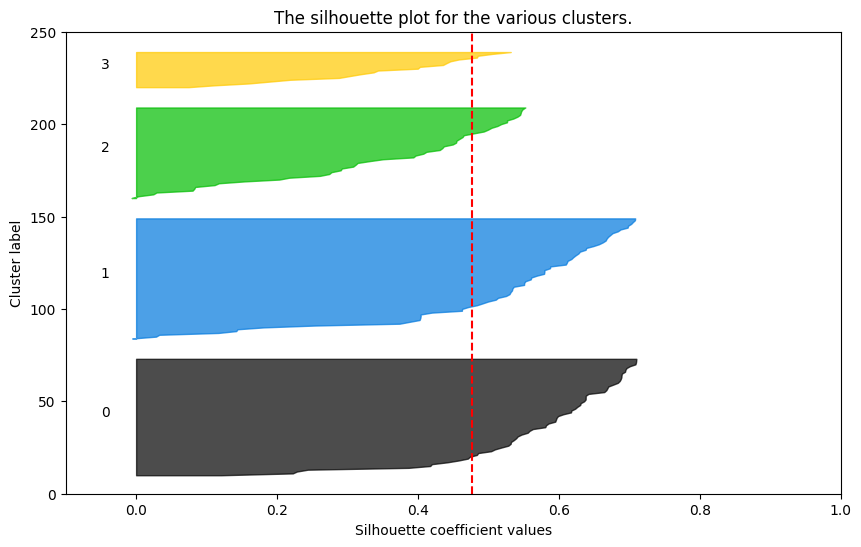

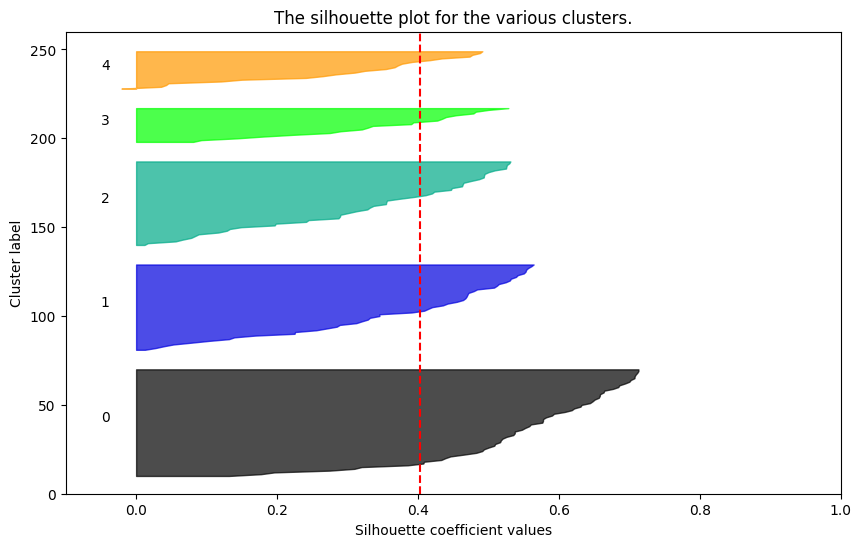

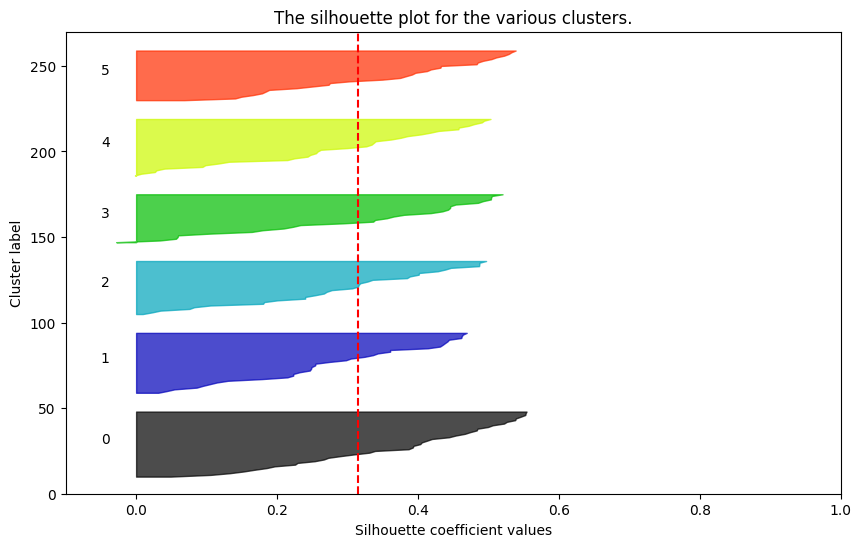

In [43]:
# 최적의 실루엣 찾기
import silhouette_analysis as s
for k in range(2,7):
    s.silhouette_plot(scaled_features, k)